First Principal Component:
[-0.6778734  -0.73517866]


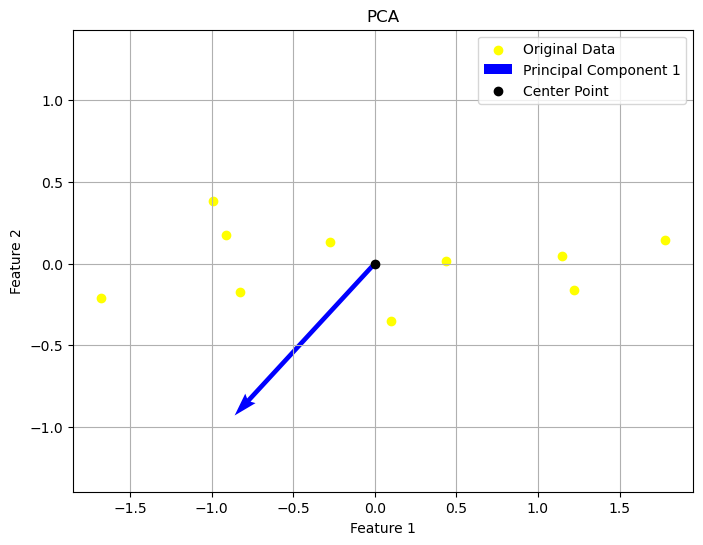

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

x = np.array( [2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2, 1, 1.5, 1.1])
y = np.array( [2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9])

# Combine x and y into a single matrix
data_matrix = np.column_stack((x, y))

# Step 1: Mean centering (normalize data)
mean = np.mean(data_matrix, axis=0)
centered_data = data_matrix - mean

# Step 2: Compute the covariance matrix
covariance_matrix = np.cov(centered_data.T)

# Step 3: Compute eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

# Step 4: Sort eigenvectors by eigenvalues
sorted_indices = np.argsort(eigen_values)[::-1]
sorted_eigen_values = eigen_values[sorted_indices]
sorted_eigen_vectors = eigen_vectors[:, sorted_indices]

# Step 5: Compute the first principal component
first_principal_component = sorted_eigen_vectors[:, 0]

print("First Principal Component:")
print(first_principal_component)

# Initialize PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_matrix)

# Extract the first principal component
first_pc = pca.components_[0]

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='yellow', label='Original Data')
plt.quiver(*X_pca.mean(axis=0), *first_pc, color='blue', scale=3, label='Principal Component 1')

# Plot center point
plt.scatter(X_pca.mean(axis=0)[0], X_pca.mean(axis=0)[1], color='black', label='Center Point', zorder=5)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('PCA')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()